### 数据库操作
从数据库中导入POI数据

In [2]:
import psycopg2

con = psycopg2.connect(database="prato", user="postgres", password="1218", host="127.0.0.1", port="5432")

cur = con.cursor()
cur.execute("select * from function")
rows = cur.fetchall()

print("Database opened successfully")

Database opened successfully


### GeoMath
提供坐标与经纬度之间的相互转换

In [3]:
# 基本静态变量
center = [43.878150000000005, 11.083850000000002]
equatorial_radius = 6378137.0
polar_radius = 6356752.3
earth_radius = 6367908.065252312
map_ratio = 0.7211005671900231

In [4]:
# 方法
import math

def calcEarthRadius(lat):
    global earth_radius
    global equatorial_radius
    global polar_radius
    lat = math.radians(lat)
    
    a = equatorial_radius
    b = polar_radius

    ta = a * math.cos(lat)
    tb = b * math.sin(lat)

    earth_radius = math.sqrt((ta * a * ta * a + tb * b * tb * b) / (ta * ta + tb * tb))


def haversineDistance(lat1, lng1, lat2, lng2):
    calcEarthRadius((lat1+lat2)/2)

    dlat = math.radians(lat2 - lat1)
    dlng = math.radians(lng2 - lng1)

    a = math.sin(dlat/2)*math.sin(dlat/2) + math.sin(dlng/2)*math.sin(dlng/2)*math.cos(lat1)*math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))


def latLngToXY(lat, lng):
    global map_ratio
    dist = haversineDistance(lat, lng, center[0], center[1])
    y = math.radians(lat - center[0])
    xp = math.radians(lng - center[1])
    
    if(map_ratio == 0.0):
        yp = math.log(math.tan(math.pi / 4.0 + math.radians(lat) / 2.0)) - math.log(math.tan(math.pi/4.0 + math.radians(center[0]) / 2.0))
        map_ratio = y/yp

    x = map_ratio * xp
    
    return earth_radius * x, earth_radius * y
    

def xyToLatLng(x, y):
    global map_ratio
    lat = math.degrees(y / earth_radius) + center[0]
    x /= map_ratio
    lng = math.degrees(x / earth_radius) + center[1]

    return lat, lng


calcEarthRadius(center[0])

#### Test function
检查经纬度转换是否正确

In [5]:
print(earth_radius)
x, y = latLngToXY(43.831, 11.0202)
print(x, y)
x, y = latLngToXY(43.9253, 11.1475)
print(x, y)

6367908.065252312
-5101.160603307125 -5240.303600544768
5101.146521771683 5240.289134910398


In [6]:
from time import time

start = time()

cnt = 0
for row1 in rows:
    x, y = latLngToXY(row1[1], row1[2])
    
    cnt += 1
    print("{}/{}".format(cnt, len(rows)))
    print("time cost: ", time() - start)
    for row2 in rows:
        x, y = latLngToXY(row2[1], row2[2])



1/23925
time cost:  0.0
2/23925
time cost:  0.10226631164550781
3/23925
time cost:  0.1972947120666504
4/23925
time cost:  0.316791296005249
5/23925
time cost:  0.4159994125366211
6/23925
time cost:  0.56600022315979
7/23925
time cost:  0.6729981899261475
8/23925
time cost:  0.7650024890899658
9/23925
time cost:  0.8595788478851318
10/23925
time cost:  0.9789488315582275
11/23925
time cost:  1.069572925567627
12/23925
time cost:  1.1565866470336914
13/23925
time cost:  1.2665715217590332
14/23925
time cost:  1.3865723609924316
15/23925
time cost:  1.4846069812774658
16/23925
time cost:  1.5936858654022217
17/23925
time cost:  1.6837167739868164
18/23925
time cost:  1.7707529067993164
19/23925
time cost:  1.8727915287017822
20/23925
time cost:  1.9550085067749023
21/23925
time cost:  2.06101393699646
22/23925
time cost:  2.1607210636138916
23/23925
time cost:  2.24581241607666
24/23925
time cost:  2.340247392654419
25/23925
time cost:  2.4218153953552246
26/23925
time cost:  2.523478984

KeyboardInterrupt: 

In [7]:
class Gpoi:
    def __init__(self, placeid, x, y, funtion):
        self.placeid = placeid
        self.x = x
        self.y = y
        self.type = funtion
        
    def __lt__(self, other):
        return self.x < other.x
    

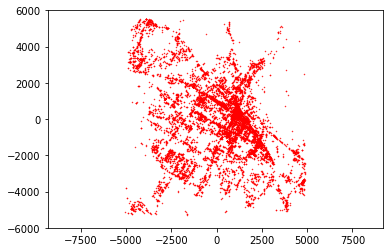

In [25]:
%matplotlib inline
colors = np.random.rand(len(x))
import matplotlib.pyplot as plt

plt.scatter(x, y, s=0.2, c='r')

plt.axis("equal")
plt.ylim(-6000, 6000)

plt.show()

In [8]:
p = []
for row in rows:
    x, y = latLngToXY(row[1], row[2])
    if('null' in row[7]):
        continue
    p.append(Gpoi(row[0], x, y, row[7]))

p = sorted(p)

In [9]:
for q in p:
    print(q.x, q.y)

4 -977.7184103760937
3240.153049929908 -3387.6017786943507
3241.2169012436448 -971.805708149673
3244.518849036788 -997.4792837365071
3256.1081290322195 -1559.3861388546668
3257.313263231855 -5028.9018045616685
3257.313263231855 -5028.9018045616685
3270.431831091057 -3877.978870521971
3274.756822051597 -655.7206761500022
3278.8925619078063 -1024.5198942415311
3280.1347754685175 -1006.1816256709473
3282.6913917534357 -1038.6125759080562
3285.4922680641325 3766.0855671239956
3292.7013645674338 -1047.948421862358
3304.426393513159 -1032.0663696626011
3311.3533180398244 -3895.5391785028914
3321.809997355703 -1496.724813924573
3335.188123527756 -3908.831664906751
3341.7580829837248 -1818.5226368773806
3341.822199824017 -1820.5231761141767
3342.3750244017056 -1629.7050847060004
3347.9125091415062 -1113.7439089475233
3347.9125091415062 -1113.7439089475233
3349.9032126768957 4414.6917108447515
3350.2290743714975 -1576.5907740146679
3351.2791343314407 -1775.5332720025626
3352.419071401684 -3921.

In [51]:
placeid = 'ChIJna90d1v2KhMRjZSxQeYnQOY'
cur = con.cursor()
cur.execute("select * from function where placeid = \'{}\'".format(placeid))
row = cur.fetchall()[0]
x, y = latLngToXY(row[1], row[2])
t = Gpoi(row[0], x, y, row[6])
cur.close()

In [73]:
import bisect
import copy

def rangeAABB(lst, pt, rang):
    tt = copy.deepcopy(pt)
    tt.x -= rang
    left = bisect.bisect_left(lst, tt)
    #print(left)
    tt.x += rang*2
    right = bisect.bisect_left(lst, tt)
    #print(right)
    partP = p[left:right]
    partP.sort(key=lambda p: p.y)
    keys = [p.y for p in partP]
    left = bisect.bisect_left(keys, tt.y-rang)
    right = bisect.bisect_left(keys, tt.y+rang)
    return partP[left:right]


In [65]:

tt = copy.deepcopy(t)
tt.x -= 50


16454
17028
574


In [111]:
# from time import time

# start = time()

# print(len(p))
# for t in p:
#     partP = rangeAABB(p, t, ran)
#     # print(len(partP))

# print("{} seconds".format(str(time() - start)))

10414
11.511994123458862 seconds


In [112]:
from time import time
start = time()

ran = 150
step = ran/3*2
index = np.arange(9).reshape(3, 3)

print(len(p))

for t in p:
    partP = []
    bb = [t.x-ran, t.x+ran, t.y-ran, t.y+ran]
    for q in p:
        if()
            partP.append(q)
        # print(len(partP))

print(len(partP))
print("{} seconds".format(str(time() - start)))

10414
204
26.8440260887146 seconds


In [117]:
print(index[1, 1])

4


In [9]:
import numpy as np
a = np.random.randn(3, 3)~
b = np.random.randn(3, 3)
print(a)
print(b)

a = a[np.newaxis, :]
b = b[np.newaxis, :]


[[ 0.92941202 -0.21605436  0.02647636]
 [ 0.45153039 -0.06271475  0.88786447]
 [-1.15372398 -1.86609403 -1.1007605 ]]
[[-0.00854755  1.16653565 -0.13562239]
 [ 0.36311064  0.55410077  0.34260217]
 [ 0.21500937  0.2389833  -1.0079439 ]]


In [12]:
c = np.concatenate((a, b), axis=0)
print(c.shape)

(2, 3, 3)


(1, 1, 3, 3)
